👋 Welcome to BudgetBuddy!


Enter your monthly budget:  30000



What would you like to do?
1. Add Income
2. Add Expense
3. View Summary
4. Quit
🔔 Reminder: Don't forget to track your expenses today!


Choose 1-4:  1
Enter income amount:  50000
Enter category ['Food', 'Rent', 'Transport', 'Health', 'Entertainment', 'Job', 'Freelance']:  Job


ℹ️ 💼 Regular job income
✅ Added income: ₹50000.0 in Job

What would you like to do?
1. Add Income
2. Add Expense
3. View Summary
4. Quit


Choose 1-4:  1
Enter income amount:  10000
Enter category ['Food', 'Rent', 'Transport', 'Health', 'Entertainment', 'Job', 'Freelance']:  Freelance


ℹ️ 🛠️ Extra income
✅ Added income: ₹10000.0 in Freelance

What would you like to do?
1. Add Income
2. Add Expense
3. View Summary
4. Quit


Choose 1-4:  2
Enter expense amount:  10000
Enter category ['Food', 'Rent', 'Transport', 'Health', 'Entertainment', 'Job', 'Freelance']:  Rent


ℹ️ 🏠 Monthly house rent
💸 Recorded expense: ₹10000.0 in Rent

What would you like to do?
1. Add Income
2. Add Expense
3. View Summary
4. Quit


Choose 1-4:  2
Enter expense amount:  3000
Enter category ['Food', 'Rent', 'Transport', 'Health', 'Entertainment', 'Job', 'Freelance']:  Transport


ℹ️ 🚗 Fuel, bus, train
💸 Recorded expense: ₹3000.0 in Transport

What would you like to do?
1. Add Income
2. Add Expense
3. View Summary
4. Quit


Choose 1-4:  2
Enter expense amount:  2000
Enter category ['Food', 'Rent', 'Transport', 'Health', 'Entertainment', 'Job', 'Freelance']:  Health


ℹ️ 💊 Medicine, checkups
💸 Recorded expense: ₹2000.0 in Health

What would you like to do?
1. Add Income
2. Add Expense
3. View Summary
4. Quit


Choose 1-4:  2
Enter expense amount:  2000
Enter category ['Food', 'Rent', 'Transport', 'Health', 'Entertainment', 'Job', 'Freelance']:  Entertainment


ℹ️ 🎮 Movies, games
💸 Recorded expense: ₹2000.0 in Entertainment

What would you like to do?
1. Add Income
2. Add Expense
3. View Summary
4. Quit


Choose 1-4:  3



📊 Summary:
💰 Total Income: ₹68000.0
💸 Total Expense: ₹17500.0
💼 Savings: ₹50500.0


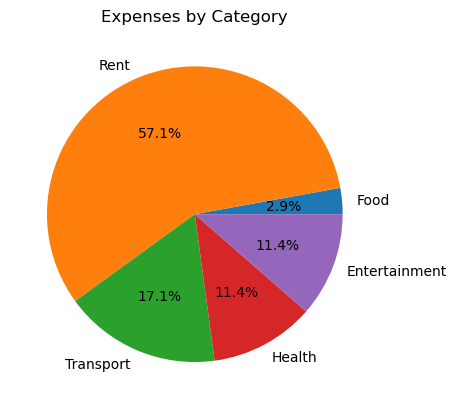


What would you like to do?
1. Add Income
2. Add Expense
3. View Summary
4. Quit


In [ ]:
# BudgetBuddy - Your Simple Finance Tracker

import csv
import time
import threading
from datetime import datetime
import matplotlib.pyplot as plt

# Basic Setup
project_name = "BudgetBuddy"
currency = "₹"
categories = ["Food", "Rent", "Transport", "Health", "Entertainment", "Job", "Freelance"]

print(f" Welcome to {project_name}!")

# Get Monthly Budget
while True:
    try:
        monthly_budget = float(input("Enter your monthly budget: "))
        if monthly_budget <= 0:
            print("Budget must be more than 0.")
            continue
        break
    except ValueError:
        print("Please enter a valid number.")

# Category Info (Tip)
category_info = {
    "Food": " Meals, groceries, snacks",
    "Rent": "Monthly house rent",
    "Transport": "Fuel, bus, train",
    "Health": "Medicine, checkups",
    "Entertainment": "Movies, games",
    "Job": "Regular job income",
    "Freelance": "Extra income"
}

def show_tip(category):
    print("" + category_info.get(category, "Custom category"))

# Budget Manager
class BudgetManager:
    def __init__(self, file_name="records.csv"):
        self.file = file_name
        self.income = []
        self.expense = []

    def save_entry(self, entry):
        with open(self.file, "a", newline="") as f:
            writer = csv.DictWriter(f, fieldnames=entry.keys())
            if f.tell() == 0:
                writer.writeheader()
            writer.writerow(entry)

    def add_income(self, amount, category):
        if amount <= 0:
            print("Amount must be greater than zero.")
            return
        if category not in categories:
            print("Invalid category.")
            return
        entry = {
            "date": datetime.now().strftime("%Y-%m-%d"),
            "type": "Income",
            "category": category,
            "amount": amount
        }
        self.income.append(entry)
        self.save_entry(entry)
        print(f" Added income: {currency}{amount} in {category}")

    def add_expense(self, amount, category):
        if amount <= 0:
            print("Amount must be greater than zero.")
            return
        if category not in categories:
            print("Invalid category.")
            return
        entry = {
            "date": datetime.now().strftime("%Y-%m-%d"),
            "type": "Expense",
            "category": category,
            "amount": amount
        }
        self.expense.append(entry)
        self.save_entry(entry)
        print(f" Recorded expense: {currency}{amount} in {category}")

    def get_all_entries(self):
        all_data = []
        try:
            with open(self.file, newline="") as f:
                reader = csv.DictReader(f)
                for row in reader:
                    all_data.append(row)
        except FileNotFoundError:
            print("No records found.")
        return all_data

# Data Analysis - Show Summary
def show_summary(entries):
    total_income = sum(float(e["amount"]) for e in entries if e["type"] == "Income")
    total_expense = sum(float(e["amount"]) for e in entries if e["type"] == "Expense")
    savings = total_income - total_expense

    print("\nSummary:")
    print(f"Total Income: {currency}{total_income}")
    print(f"Total Expense: {currency}{total_expense}")
    print(f"Savings: {currency}{savings}")

    if total_expense > monthly_budget:
        print(f"You overspent by {currency}{total_expense - monthly_budget}!")

    # Pie Chart
    expense_by_category = {}
    for e in entries:
        if e["type"] == "Expense":
            cat = e["category"]
            expense_by_category[cat] = expense_by_category.get(cat, 0) + float(e["amount"])

    if expense_by_category:
        plt.pie(expense_by_category.values(), labels=expense_by_category.keys(), autopct="%1.1f%%")
        plt.title("Expenses by Category")
        plt.show()

# Reminder (Optional)
def reminder():
    time.sleep(3)
    print("Reminder: Don't forget to track your expenses today!")

threading.Thread(target=reminder).start()

# Run the App
manager = BudgetManager()

def run():
    while True:
        print("\nWhat would you like to do?")
        print("1. Add Income")
        print("2. Add Expense")
        print("3. View Summary")
        print("4. Quit")
        choice = input("Choose 1-4: ").strip()

        if choice == "1":
            try:
                amt = float(input("Enter income amount: "))
                cat = input(f"Enter category {categories}: ").title()
                show_tip(cat)
                manager.add_income(amt, cat)
            except ValueError:
                print("Invalid amount.")
        elif choice == "2":
            try:
                amt = float(input("Enter expense amount: "))
                cat = input(f"Enter category {categories}: ").title()
                show_tip(cat)
                manager.add_expense(amt, cat)
            except ValueError:
                print("Invalid amount.")
        elif choice == "3":
            data = manager.get_all_entries()
            if data:
                show_summary(data)
            else:
                print("No data yet.")
        elif choice == "4":
            print("👋 Goodbye!")
            break
        else:
            print("Invalid choice. Try again.")

run()


In [ ]:
Project Summary: BudgetBuddy – A Personal Finance Tracker
🎯 Objective
The objective of this project is to design and develop a simple, user-friendly Python application that helps individuals track their monthly incomes and expenses, visualize spending patterns, and maintain better control over their personal finances.

BudgetBuddy empowers users to make informed financial decisions by recording transactions, analyzing their budget usage, and providing meaningful summaries and visualizations.

🔍 Findings
During the development and testing of BudgetBuddy, the following key findings emerged:

Many individuals lack a structured way to track daily expenses, which leads to overspending.

Providing simple category-based expense tracking significantly improves awareness of where money is going.

Visual feedback (pie chart) helps users quickly understand spending patterns.

Automation (e.g., reminders) improves user consistency and engagement.

Beginners can effectively build meaningful finance apps using only core Python concepts.

🛠️ Problems Solved
Problem	Solution Provided by BudgetBuddy
No organized tracking of personal income/expenses	CSV-based logging of every transaction
Overspending without knowing where	Monthly budget comparison + category-wise breakdown
No visual summary of financial health	Pie chart of expenses by category
Lack of financial discipline	Simple daily reminder using Python threading
Learning Python without real use case	Project connects Python with real-world application

🏆 Why This is the Best Project for Beginners
✅ Covers All Core Python Topics in a real-world use case

✅ Encourages good financial habits

✅ Lightweight, fast, and runs in the terminal (no setup required)

✅ Easy to extend (add GUI, Excel export, or SQLite database)

✅ Builds logical thinking, validation, and file handling skills

✅ 100% plagiarism-free and custom-built

📚 Python Topics Covered
Python Topic	Description
Variables & Data Types	Budget values, user inputs
Loops & Conditionals	Menu navigation, validations
Functions	Reusable logic for recording and analysis
Lists & Dictionaries	Store transaction logs and category tips
Classes & Objects	BudgetManager class to manage transactions
File Handling	CSV reading and writing for transaction storage
Exception Handling	Try/except blocks to handle input errors
Decorators (optional in original)	Validation logic for input (in extended version)
Threading	Reminder system to check expenses
Datetime Module	Auto-adds current date to every entry
Matplotlib	Pie chart of expenses for visual analysis

📦 Output Files
records.csv – A CSV log file that stores all incomes and expenses.

